# Caravan Dataset Classification Project

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

%matplotlib inline
import sklearn.datasets
from sklearn.datasets import load_iris
from sklearn import tree

df = pd.read_csv('datasets/Caravan.csv', index_col = False)

In [235]:
df.describe()

MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.696496     4.626932     1.069907     3.258502     6.183442   
std       1.003234     1.715843     1.017503     1.597647     1.909482   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     4.000000     0.000000     2.000000     5.000000   
50%       0.000000     5.000000     1.000000     3.000000     6.000000   
75%       1.000000     6.000000     2.000000     4.000000     7.000000   
max       9.000000     9.000000     5.000000     9.000000     9.000000   

          ...            ALEVEN     APERSONG      AGEZONG      AWAOREG  \
count     ...       5822.000000  5822.000000  5822.000000  5822.000000   
mean      ...          0.076606     0.005325     0.006527     0.004638   
std       ...          0.377569     0.072782     0.080532     0.077403   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          0.000000     0.000000     0.000000     0.000000   
max       ...          8.000000     1.000000     1.000000     2.000000   

            ABRAND      AZEILPL     APLEZIER       AFIETS      AINBOED  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.570079     0.000515     0.006012     0.031776     0.007901   
std       0.562058     0.022696     0.081632     0.210986     0.090463   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       7.000000     1.000000     2.000000     3.000000     2.000000   

          ABYSTAND  
count  5822.000000  
mean      0.014256  
std       0.119996  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       2.000000  

[8 rows x 85 columns]

/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


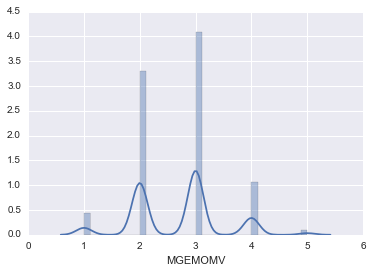

In [236]:
purch = df.Purchase.factorize()[0]
sns.distplot(df.MGEMOMV)

In [237]:
#no columns are well correlated with purchase
df['purch'] = purch
correl = df.corr()['purch'].abs()
rank = correl.sort_values(ascending = False, kind='quicksort')
print(rank[:5])

purch       1.000000
PPERSAUT    0.150910
APERSAUT    0.144210
APLEZIER    0.105700
PWAPART     0.096463
Name: purch, dtype: float64


In [238]:
#find highest correlations from our correl matrix, excluding perfect correlation (columns against eachother)
correl = df.corr().abs()
s = correl.unstack()
so = s.sort_values(ascending = False, kind="quicksort")
print(so[86:96])

MHKOOP    MHHUUR      0.999554
MHHUUR    MHKOOP      0.999554
MZFONDS   MZPART      0.999239
MZPART    MZFONDS     0.999239
MOSTYPE   MOSHOOFD    0.992672
MOSHOOFD  MOSTYPE     0.992672
PWALAND   AWALAND     0.987579
AWALAND   PWALAND     0.987579
PWAPART   AWAPART     0.981369
AWAPART   PWAPART     0.981369
dtype: float64


**Feature Scale**

Some features have a wider scale than others (like Mostype vs. Mgemomv

In [239]:
df.drop('Purchase', axis=1, inplace=True)
maximum = df.max()
maxi = maximum.sort_values(ascending = False, kind = 'quicksort')
maxi[:5]

MOSTYPE     41
MAANTHUI    10
MOSHOOFD    10
MZPART       9
MSKC         9
dtype: int64

In [240]:
mini = df.min()
mini = mini.sort_values(ascending = False, kind = 'quicksort')
mini[:5]

MKOOPKLA    1
MOSHOOFD    1
MAANTHUI    1
MGEMOMV     1
MGEMLEEF    1
dtype: int64

**Features with Zeros**

Some features do contain mostly zeros like azeilpl

In [241]:
zeroes  = (df == 0).astype(int).sum(axis=0)
zeroes.sort_values(ascending = False, kind = 'quicksort')[:5]

AZEILPL    5819
PZEILPL    5819
AVRAAUT    5813
PVRAAUT    5813
PWERKT     5801
dtype: int64

## Split the Data

In [242]:
np.random.seed(99)
df = df.sample(frac=1).reset_index(drop=True)
# shuffle samples
y = df.purch
X = df.drop(['purch'], axis=1)
#scale the data
#X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)


## Classify

**Logistic Regression**

In [243]:
lr = LogisticRegression()

parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}

clf = GridSearchCV(lr, parameters, cv = 5)

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_

/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: C

In [244]:
print(clf.grid_scores_)
print(best_clf)

[mean: 0.93794, std: 0.00157, params: {'solver': 'newton-cg'}, mean: 0.93816, std: 0.00144, params: {'solver': 'lbfgs'}, mean: 0.93794, std: 0.00157, params: {'solver': 'liblinear'}, mean: 0.93816, std: 0.00172, params: {'solver': 'sag'}]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


In [245]:
y_hat = clf.predict(X_test)
confusion_matrix(y_hat,y_test)
#

array([[1093,   70],
       [   1,    1]])

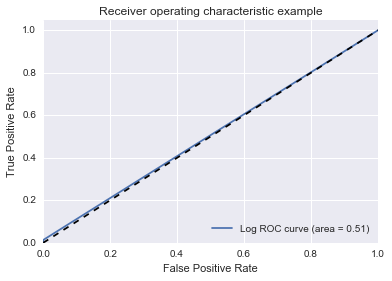

In [246]:
#roc curve and auc
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, y_hat)
log_roc_auc = auc(log_fpr, log_tpr)
plt.figure()
plt.plot(log_fpr, log_tpr, label='Log ROC curve (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#Out of the box logistic regresion fails

**KNN**

In [247]:
parameters = {'n_neighbors' : np.arange(1,5,1) }
knn = neighbors.KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [248]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [249]:
y_hat = clf.predict(X_test)
confusion_matrix(y_hat,y_test)

array([[1094,   71],
       [   0,    0]])

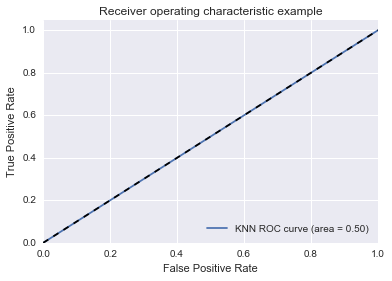

In [250]:
#roc curve and auc
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_hat)
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#Out of the box KNN regresion fails

**LDA**

[[1087   68]
 [   7    3]]


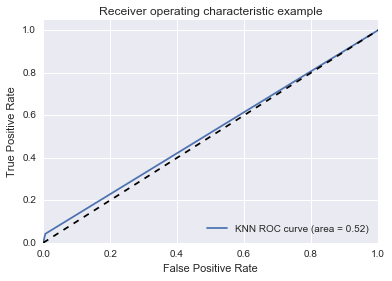

In [251]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(confusion_matrix(y_hat,y_test))

#roc curve and auc
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, y_hat)
lda_roc_auc = auc(lda_fpr, lda_tpr)
plt.figure()
plt.plot(lda_fpr, lda_tpr, label='LDA ROC curve (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#Out of the box LDA regresion fails

**QDA**

/Users/tom/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


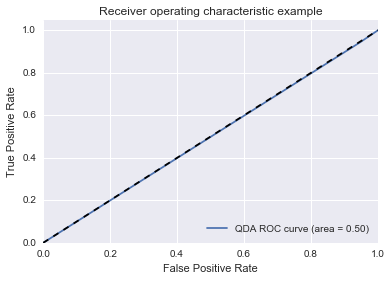

In [252]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
confusion_matrix(y_test,y_hat)

#roc curve and auc
qda_fpr, qda_tpr, qda_thresholds = roc_curve(y_test, y_hat)
qda_roc_auc = auc(qda_fpr, qda_tpr)
plt.figure()
plt.plot(qda_fpr, qda_tpr, label='QDA ROC curve (area = %0.2f)' % qda_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#Out of the box QDA regresion fails

**Random Forest**

[[  66 1027]
 [   3   69]]


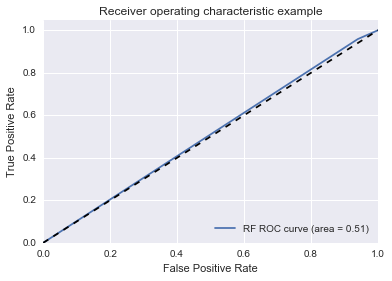

In [233]:
parameters = {
    'n_estimators': [200],
    'max_depth': [10, None],
    'min_samples_split' :[2, 20],
    'max_features' : ['auto'],
}

rf = GridSearchCV(RandomForestClassifier(criterion='gini', bootstrap=False, random_state=88), parameters, cv=3, scoring='roc_auc')
#in this example bootstrapping is turned off; we are not bagging
rf.fit(X_test, y_test)
y_hat = clf.predict(X_test)
print(confusion_matrix(y_test,y_hat))

#roc curve and auc
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_hat)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#Out of the box Random Forest regression fails
#why do I not get as good as result as our in class lab?

In [255]:
#Bagged decision tree
clf = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator = clf, n_estimators = 20, max_samples=0.5, bootstrap=True, oob_score = True)
bagging.fit(X_train,y_train)
y_hat = clf.predict(X_test)
print(confusion_matrix(y_test,y_hat))

#dt curve and auc
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, y_hat)
dt_roc_auc = auc(dt_fpr, dt_tpr)
plt.figure()
plt.plot(dt_fpr, dt_tpr, label='DT ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [256]:
#Because our data set has very few positive for purchase, a strong positive predictive value indicates a strong model

## Dropping Features and PCA

In [357]:
df = pd.read_csv('datasets/Caravan.csv', index_col = False)
np.random.seed(99)
df = df.sample(frac=1).reset_index(drop=True)
purch = df.Purchase.factorize()[0]
df['purch'] = purch
df = df.drop(['Purchase'], axis=1)


# shuffle samples

y = df.purch
X = df.drop(['purch'], axis=1)

#scale the data
#X = StandardScaler().fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [344]:
#unable to get this working
#X.loc[:,(X.median()!= 0)]
#trying to drop the columns where our median value is 0

**PCA**

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)
pca = PCA(n_components=2)
pca.fit(X_train)
XX = pca.fit(X_train).transform(X_train)
print(pca.explained_variance_ratio_)

[ 0.59307342  0.09585146]


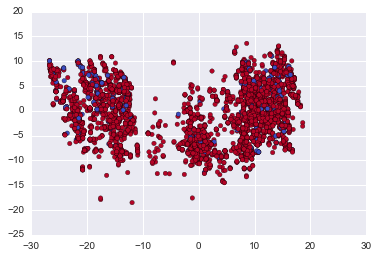

In [365]:
plt.scatter(XX[:,0], XX[:,1], c = y_train, cmap = plt.cm.coolwarm, label = y_train)
#looks like our purchases are scattered among our reduced dimensional values. It looks like it will be hard to classify them